# Research Objective

The research objective is to understand the effect of covid vaccinations on the positivity rates based on the maltese population. The aim is to also see if there are any correlations between the Air Quality Index and the number of cases throughout the pandemic


# Overview

In this notebook we will:
   - Briefly discuss the evolution of Decision Support System
   - Understand and explore the features of the dataset
   - Show Statistical Information
   - Find relationships between the covid dataset and AQI dataset


# Evolution of Decision Support Systems

In a book by Sànchez-Marrè, M. (2022) called "Evolution of Decision Support Systems", the author describes how Decision Support Systems came to be. During the late 60s and early 70s, Management Information Systems processing data computationally to extract information, started to include Transaction Processing Systems whereby these evolved into the first ever Decision Support Systems (DSS) later on in the 70s. The first processes were able to integrate spreadsheet software to support the decision-maker.

Later on in the 80s, DSS incorporated other processes such as the use of operations research models and other management/business models. It also had the possibility to run "what if" analysis, which allowed users to run simulation models to make the right choice on the possible alternatives. 

Finally, these systems evolved in the late 80s and 90s into Intelligent Decision Support Systems (IDSS) which integrated artificial intelligence models, statistical/mathematical models.








# Data Preparation

 - The first step is importing all the required data into this notebook 

In [15]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
AQIFile = open( './Data/msida-AQI.csv', 'r')
CovidTestsFile = open( './Data/COVIDTests.csv', 'r')
CovidCasesFile = open('./Data/COVID19.csv', 'r')
VaccinationFile = open('./Data/Vaccination.csv' , 'r')

Once we have all the data imported into the notebook, we need to make sure that all numeric fields are changed to an integer field. This will be done by going through every character and check whether it is a digit in the below method.

In [17]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0
                
AQIdata=[]
for line in AQIFile:
    data1=line.split(',')
    if len(data1)==7:
        AQIdata.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6])])
        
covidtestsdata=[]
for line in CovidTestsFile:
    data1=line.split(',')
    if len(data1)==7:
        covidtestsdata.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6])])  
        
covidcases=[]
for line in CovidCasesFile:
    data1=line.split(',')
    if len(data1)==6:
        covidcases.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5])])  
        
vaccinecases=[]
for line in VaccinationFile:
    data1=line.split(',')
    if len(data1)==8:
        vaccinecases.append([pd.to_datetime(data1[0],format="%d/%m/%Y"),chr_int(data1[1]),chr_int(data1[2]),chr_int(data1[3]),chr_int(data1[4]),chr_int(data1[5]),chr_int(data1[6]),chr_int(data1[7])])         


In order to explore the data further, we will assign each list to a dataframe. Then, we can make sure that the field type within the 4 datasets are correct by using .dtypes to display the field type for each dataset.

In [18]:
aqi_df = pd.DataFrame(AQIdata) 
covidtests_df = pd.DataFrame(covidtestsdata)
covidcases_df = pd.DataFrame(covidcases)
vaccines_df = pd.DataFrame(vaccinecases)

In [19]:
aqi_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
dtype: object

In [20]:
covidtests_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
dtype: object

In [21]:
covidcases_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
dtype: object

In [22]:
vaccines_df.dtypes

0    datetime64[ns]
1             int64
2             int64
3             int64
4             int64
5             int64
6             int64
7             int64
dtype: object

After ensuring that the datatypes are correct, We will now modify the dataframes to add a column name for each field.

In [23]:
aqi_df.columns = ["Date", "pm25", "pm10", "o3", 
                "no2", "so2", "co"]


covidtests_df.columns = ["Date","NAA tests in previous day","Total NAA tests","Rapid antigen tests in previous day","Total rapid antigen tests",
                         "NAA and rapid antigen tests in previous day","Total NAA and rapid antigen tests"]

covidcases_df.columns = ["Date","New Cases","Total Cases","Recovered","Deaths","Active Cases"]

vaccines_df.columns = ["Date","Total Vaccination", "Primary Vaccination", "One Dose", "Total Booster Doses", "Total 2nd Booster Doses", "Omicron Booster doses",
                      "Total Omicron Booster doses"]

# Data Analysis
## Part 1

Now that we have all the necessary data in hand, we will start making analysis of the data itself. Through the first part of the analysis we should be able to understand:
- How covid cases started rising
- Analyse whether warmer months had efect on the covid cases
- Get a hollistic view of the total number of recovieries, deaths and new cases per month
- Get an idea of the rate between the total deaths and new cases per month
- Analyse the total number of vaccinations per month
- Get the average of vaccinations per month
- Compare the average vaccinations with the number of cases per month
- Analyse whether covid cases reduced when vaccinations started

In [24]:
covidcases_df['YearMonth'] = covidcases_df.Date.dt.to_period('M')

MonthlyCovidCases_df =  covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'New Cases':sum})


MonthlyDeaths_df = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'Deaths':max})
MonthlyDeaths_df = MonthlyDeaths_df['Deaths'] - MonthlyDeaths_df['Deaths'].shift(fill_value=0)
MonthlyCovidCases_df["New Deaths"] = MonthlyDeaths_df

MonthlyRecoveries_df = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'Recovered':max})
MonthlyRecoveries_df = MonthlyRecoveries_df['Recovered'] - MonthlyRecoveries_df['Recovered'].shift(fill_value=0)
MonthlyCovidCases_df["New Recoveries"] = MonthlyRecoveries_df


MonthlyCovidCases_df = MonthlyCovidCases_df.rename_axis(['YearMonth']).reset_index()

print ('Statistics of number of cases per month: mean:', MonthlyCovidCases_df['New Cases'].mean(), 'var:', MonthlyCovidCases_df['New Cases'].var(), 'std:', MonthlyCovidCases_df['New Cases'].std())



Statistics of number of cases per month: mean: 3424.264705882353 var: 16903322.564171128 std: 4111.3650487607065


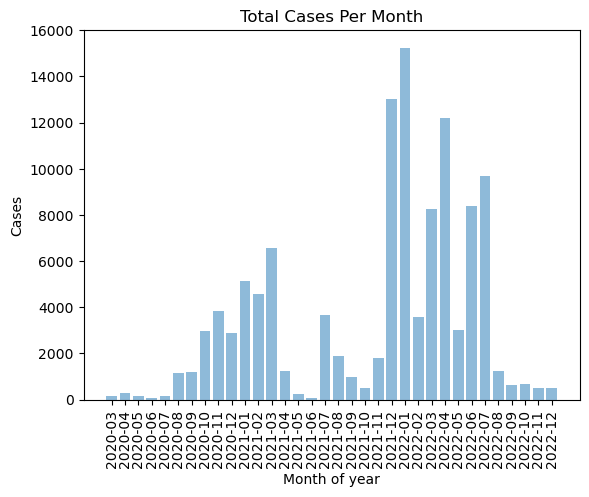

In [25]:
ticks = range(len(MonthlyCovidCases_df))
plt.bar(ticks, MonthlyCovidCases_df['New Cases'],align='center', alpha=0.5)
plt.xticks(ticks, MonthlyCovidCases_df['YearMonth'], rotation='vertical')
plt.ylabel('Cases')
plt.xlabel('Month of year')
plt.title('Total Cases Per Month')
plt.show()

In the above graph, we can see how covid cases started increasing per month. One can also note that on average, in warmer months, the number of new cases was less than in colder months.

In [26]:
CovidCases2ndQuarter_df = MonthlyCovidCases_df[(MonthlyCovidCases_df.YearMonth >= '2020-04') & (MonthlyCovidCases_df.YearMonth <= '2020-06')]
CovidCases3rdQuarter_df = MonthlyCovidCases_df[(MonthlyCovidCases_df.YearMonth >= '2020-07') & (MonthlyCovidCases_df.YearMonth <= '2020-09')]
CovidCases4thQuarter_df = MonthlyCovidCases_df[(MonthlyCovidCases_df.YearMonth >= '2020-10') & (MonthlyCovidCases_df.YearMonth <= '2020-12')]


In [27]:
print ('Statistics of number of cases in 2nd Quarter: mean:', CovidCases2ndQuarter_df['New Cases'].mean(), 'var:', CovidCases2ndQuarter_df['New Cases'].var(), 'std:', CovidCases2ndQuarter_df['New Cases'].std())
print ('Statistics of number of cases in 3rd Quarter: mean:', CovidCases3rdQuarter_df['New Cases'].mean(), 'var:', CovidCases3rdQuarter_df['New Cases'].var(), 'std:', CovidCases3rdQuarter_df['New Cases'].std())
print ('Statistics of number of cases in 4th Quarter: mean:', CovidCases4thQuarter_df['New Cases'].mean(), 'var:', CovidCases4thQuarter_df['New Cases'].var(), 'std:', CovidCases4thQuarter_df['New Cases'].std())


Statistics of number of cases in 2nd Quarter: mean: 167.0 var: 15031.0 std: 122.60097878891506
Statistics of number of cases in 3rd Quarter: mean: 831.0 var: 343777.0 std: 586.3249952031723
Statistics of number of cases in 4th Quarter: mean: 3238.6666666666665 var: 264866.3333333333 std: 514.6516621301571


The below shows a summary of the covid cases, deaths and recoveries. One can note that although the number of cases was high, the number of deaths compared to it was relatively small. In fact, one can mostly see a pattern in the recoveries and cases plots. This means that most of the times the active cases recovered.

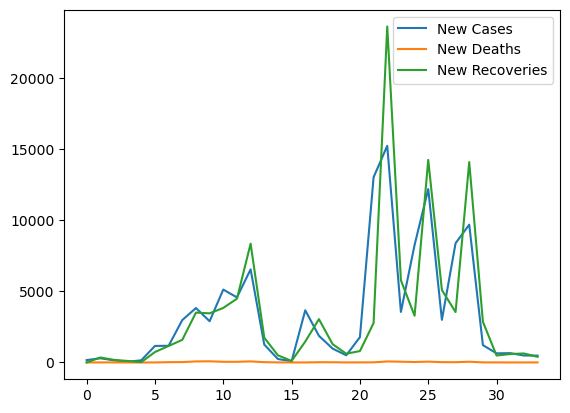

In [28]:

MonthlyCovidCases_df_pt = MonthlyCovidCases_df.plot(legend=True)


In fact the death rate compared to the new case rate on a monthly bases show how the number of deaths were in the minority.

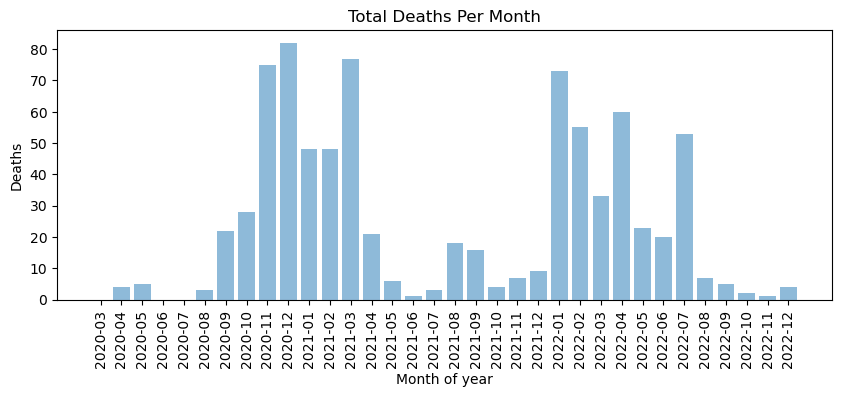

In [29]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = range(len(MonthlyCovidCases_df))
plt.bar(default_x_ticks, MonthlyCovidCases_df['New Deaths'],align='center', alpha=0.5)
plt.xticks(default_x_ticks, MonthlyCovidCases_df['YearMonth'], rotation='vertical')
plt.ylabel('Deaths')
plt.xlabel('Month of year')
plt.title('Total Deaths Per Month')
plt.show()

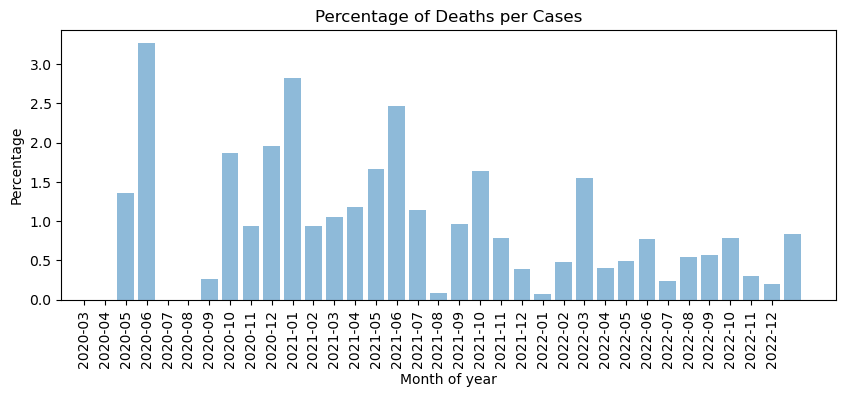

In [30]:
raw_data = {'Percentage': (MonthlyCovidCases_df['New Deaths'].div(MonthlyCovidCases_df['New Cases']))*100}
DeathPerCases = pd.DataFrame(raw_data)
DeathPerCases["YearMonth"] = MonthlyCovidCases_df['YearMonth']

plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = np.arange(len(DeathPerCases))
plt.bar(default_x_ticks+1, DeathPerCases['Percentage'],align='center', alpha=0.5, label='Percentage of Deaths')
plt.xticks(default_x_ticks, DeathPerCases['YearMonth'], rotation='vertical')
plt.ylabel('Percentage')
plt.xlabel('Month of year')
plt.title('Percentage of Deaths per Cases')
plt.show()

From the below graph, we can see that the number of cases recorded on a daily basis was generally between 0 and 200.

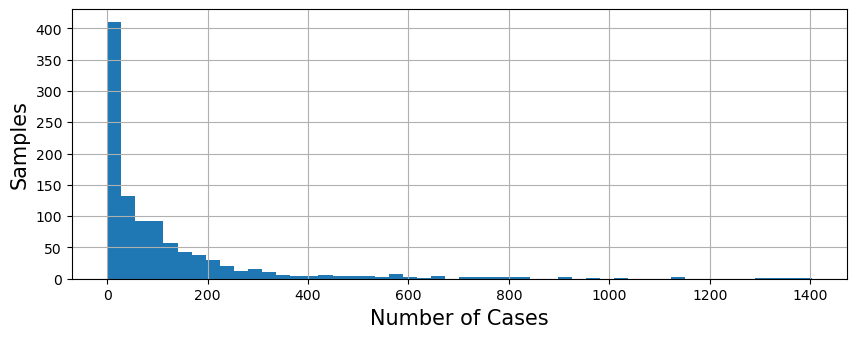

In [31]:
newcases_df=covidcases_df['New Cases']
newcases_df.hist(density=0, histtype='stepfilled', bins=50)
plt.xlabel('Number of Cases',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

The rollout of vaccination started at the end of December 2020, and hence the vaccination dataset starts as at 17/01/2022, whereby by the time already 11 thousand vaccinations were administered.

In [32]:
vaccines_df.head()

,Date,Total Vaccination,Primary Vaccination,One Dose,Total Booster Doses,Total 2nd Booster Doses,Omicron Booster doses,Total Omicron Booster doses
0,2021-01-17,11705,0,0,0,0,0,0
1,2021-01-18,13002,0,0,0,0,0,0
2,2021-01-19,14276,0,0,0,0,0,0
3,2021-01-20,15316,0,0,0,0,0,0
4,2021-01-21,16531,0,0,0,0,0,0


In [33]:
vaccines_df['YearMonth'] = vaccines_df.Date.dt.to_period('M')
vaccines_df["Daily Vaccines"] = vaccines_df['Total Vaccination'].diff()

Vaccine_df = vaccines_df.groupby([vaccines_df['YearMonth']]).agg({'Total Vaccination':max})
Vaccine_df = Vaccine_df['Total Vaccination'] - Vaccine_df['Total Vaccination'].shift(fill_value=0)

Vaccine_df = Vaccine_df.rename_axis(['YearMonth']).reset_index()




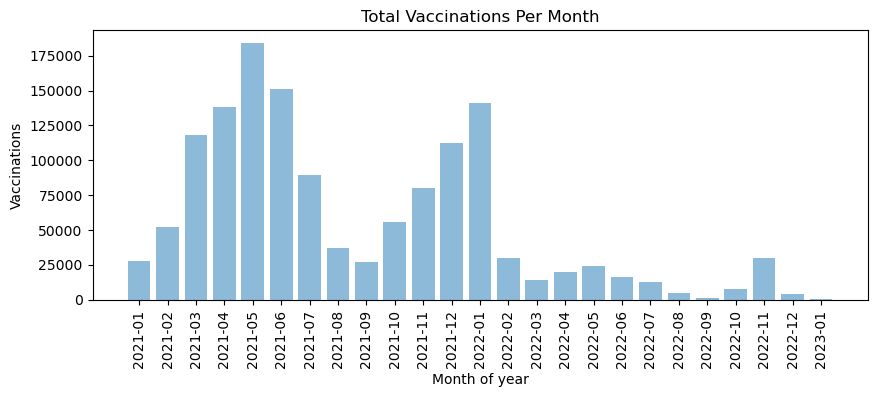

In [34]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = range(len(Vaccine_df))
plt.bar(default_x_ticks, Vaccine_df['Total Vaccination'],align='center', alpha=0.5)
plt.xticks(default_x_ticks, Vaccine_df['YearMonth'], rotation='vertical')
plt.ylabel('Vaccinations')
plt.xlabel('Month of year')
plt.title('Total Vaccinations Per Month')
plt.show()

In [35]:
print ('Statistics of number of vaccinations: mean:', Vaccine_df['Total Vaccination'].mean(), 'var:', Vaccine_df['Total Vaccination'].var(), 'std:', Vaccine_df['Total Vaccination'].std())


Statistics of number of vaccinations: mean: 55086.6 var: 3033785741.0 std: 55079.81246336992


We can analyze the average vaccinations per month along with the average number of cases per month, to see whether covid vaccines actually made a difference in the reported amount of cases.

In [36]:
meanVaccineCases_df = []

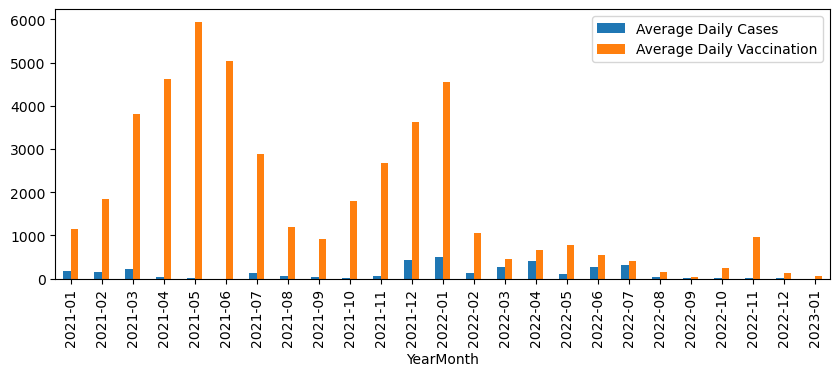

In [37]:
#meanVaccineCases_df= vaccines_df.groupby([vaccines_df['YearMonth']]).agg({'Daily Vaccines':np.mean}).astype(int)
meanVaccineCases_df = vaccines_df.groupby([vaccines_df['YearMonth']]).agg({'Daily Vaccines':np.mean}).astype(int)
meanVaccineCases_df["New Cases"] = covidcases_df.groupby([covidcases_df['YearMonth']]).agg({'New Cases':np.mean}).astype(int)
meanVaccineCases_df = meanVaccineCases_df.fillna(0).round().astype(int)
meanVaccineCases_df.rename(columns = {'Daily Vaccines':'Average Daily Vaccination'}, inplace = True)
meanVaccineCases_df.rename(columns = {'New Cases':'Average Daily Cases'}, inplace = True)
meanVaccineCases_df = meanVaccineCases_df.rename_axis(['YearMonth']).reset_index()
meanVaccineCases_df

ax = meanVaccineCases_df.plot(x="YearMonth", y=["Average Daily Cases", "Average Daily Vaccination"], kind="bar", rot="vertical")

Now we will compare the positivity rate against the number of tests done on a monthly basis.

In [38]:
covidtests_df['YearMonth'] = covidtests_df.Date.dt.to_period('M')

covidMonthlyTests_df = covidtests_df.groupby([covidtests_df['YearMonth']]).agg({'NAA and rapid antigen tests in previous day':sum})
covidMonthlyTests_df.rename(columns = {'NAA and rapid antigen tests in previous day':'Total NAA and Rapid tests'}, inplace = True)
covidMonthlyTests_df = covidMonthlyTests_df.rename_axis(['YearMonth']).reset_index()


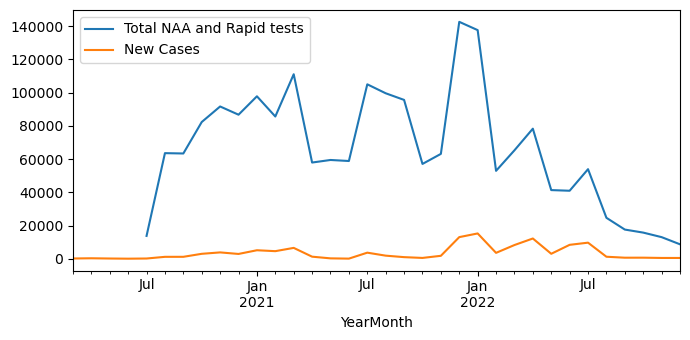

In [39]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True


ax = covidMonthlyTests_df.plot(x='YearMonth', y='Total NAA and Rapid tests')
MonthlyCovidCases_df.plot(ax=ax, x='YearMonth', y='New Cases')

plt.show()

In the above graph, we can see that on a monthly basis, the number of positive tests found when taking into consideration the amount of swabs done was very low. The next graph will show us the percentages of positive reported tests compared to the total number of tests.

In [40]:
CasesTestsFiltered_df = MonthlyCovidCases_df[(MonthlyCovidCases_df.YearMonth >= '2020-07') & (MonthlyCovidCases_df.YearMonth <= '2022-11')]
covidMonthlyTestsFiltered_df = covidMonthlyTests_df[(covidMonthlyTests_df.YearMonth >= '2020-07') & (covidMonthlyTests_df.YearMonth <= '2022-11')]


In [41]:
CasesTestsFiltered_df.head()

,YearMonth,New Cases,New Deaths,New Recoveries
4,2020-07,154,0,25
5,2020-08,1164,3,735
6,2020-09,1175,22,1162
7,2020-10,2984,28,1593
8,2020-11,3831,75,3510


In [42]:
covidMonthlyTestsFiltered_df.head()

,YearMonth,Total NAA and Rapid tests
0,2020-07,13762
1,2020-08,63594
2,2020-09,63390
3,2020-10,82336
4,2020-11,91695


In [43]:
CasesTestsFiltered_df.index = [x for x in range(0, len(CasesTestsFiltered_df.values))]
CasesTestsFiltered_df.head()


,YearMonth,New Cases,New Deaths,New Recoveries
0,2020-07,154,0,25
1,2020-08,1164,3,735
2,2020-09,1175,22,1162
3,2020-10,2984,28,1593
4,2020-11,3831,75,3510


In [44]:
percentage = {'Percentage Rate': (CasesTestsFiltered_df['New Cases'].div(covidMonthlyTestsFiltered_df['Total NAA and Rapid tests']))*100}
PositivesPerCases = pd.DataFrame(percentage)
PositivesPerCases["YearMonth"] = CasesTestsFiltered_df['YearMonth']


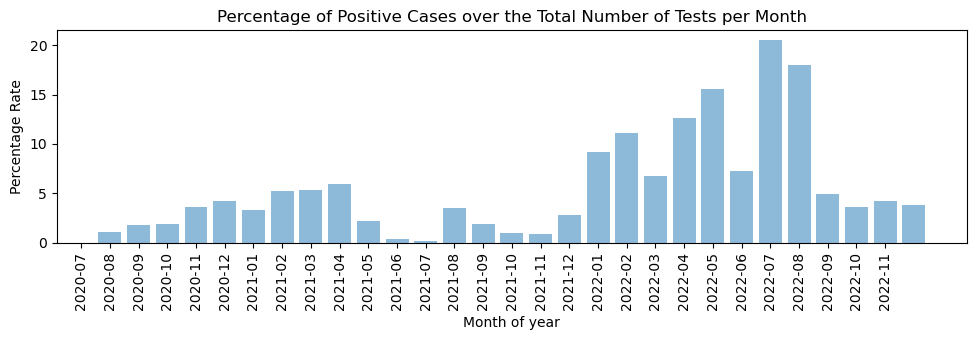

In [45]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
default_x_ticks = np.arange(len(PositivesPerCases))
plt.bar(default_x_ticks+1, PositivesPerCases['Percentage Rate'],align='center', alpha=0.5, label='Percentage of Positive Tests')
plt.xticks(default_x_ticks, PositivesPerCases['YearMonth'], rotation='vertical')
plt.ylabel('Percentage Rate')
plt.xlabel('Month of year')
plt.title('Percentage of Positive Cases over the Total Number of Tests per Month')
plt.show()

# Data Analysis
## Part 2

In the first part, we analyzed and understood the relationship between covid-19 cases, swab tests, and positivity rate. We also noticed how in warmer months, the number of cases were lower than colder months especially in 2021.

In the next part, we will be analysing whether covid had any effect on the Air Quality Index (AQI). According to IQAir, https://www.iqair.com/malta/, L-Imsida is ranked as the most polluted city in Malta, and therefore in this analysis, the Msida dataset will be used. In this part, we will be analysing the following points:
- The average AQI a year before Covid
- The average AQI Index during Covid
- Were there any improvements in the AQI during Covid ?
- If yes, when did AQI starting improving and which month had the worst AQI ?



In the dataset downloaded, the individual pollutants are present, that is PM2.5, PM10 for example. Alone, these do not show the overall AQI. In order to calculate the AQI, we need to get the max of all of these fields, per day and use the following formula 

$$
AQI = max( AQIPM2.5, AQIPM10, AQIO3, ...)
$$

In [47]:
aqi_df['YearMonth'] = aqi_df.Date.dt.to_period('M')

calculatedAQI_df = aqi_df
calculatedAQI_df.index = [x for x in range(0, len(calculatedAQI_df.values))]
calculatedAQI_df["AQI"]= aqi_df[["pm25", "pm10", "o3","no2", "so2", "co"]].apply(np.max, axis=1)

In [48]:
print ("median=", calculatedAQI_df['AQI'].median(), "min=", calculatedAQI_df['AQI'].min(), "max=", calculatedAQI_df['AQI'].max(), "average=", calculatedAQI_df['AQI'].mean())

median= 46.0 min= 1 max= 777 average= 50.120370370370374


In [50]:
PreCovidAQI_df = calculatedAQI_df[(calculatedAQI_df.Date < '2020-01-01') & (calculatedAQI_df.Date >= '2019-01-01')]

In [51]:
print ("median=", PreCovidAQI_df['AQI'].median(), "min=", PreCovidAQI_df['AQI'].min(), "max=", PreCovidAQI_df['AQI'].max(), "average=", PreCovidAQI_df['AQI'].mean())

median= 44.0 min= 2 max= 159 average= 43.009433962264154


In [52]:
PreCovidAQIOnly_df = PreCovidAQI_df['AQI']

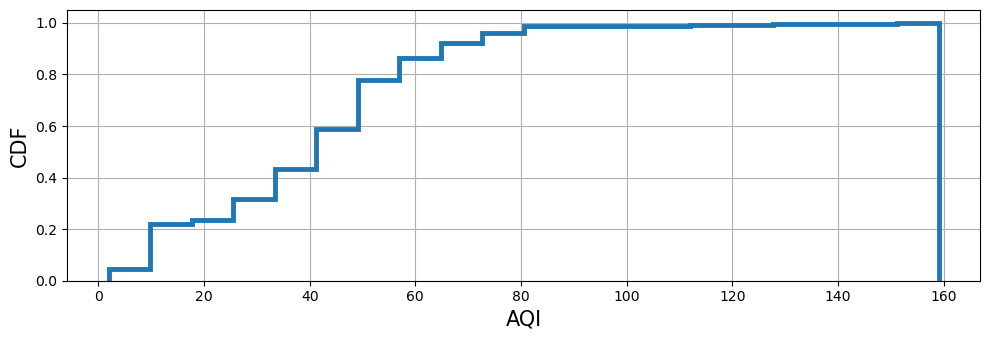

In [53]:
PreCovidAQIOnly_df.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('AQI',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

In [54]:
CovidAQI_df = calculatedAQI_df[(calculatedAQI_df.Date <= '2020-12-31') & (calculatedAQI_df.Date >= '2020-01-01')]

In [55]:
print ("median=", CovidAQI_df['AQI'].median(), "min=", CovidAQI_df['AQI'].min(), "max=", CovidAQI_df['AQI'].max(), "average=", CovidAQI_df['AQI'].mean())

median= 41.0 min= 1 max= 102 average= 43.026865671641794


In [56]:
CovidAQIOnly_df = CovidAQI_df['AQI']

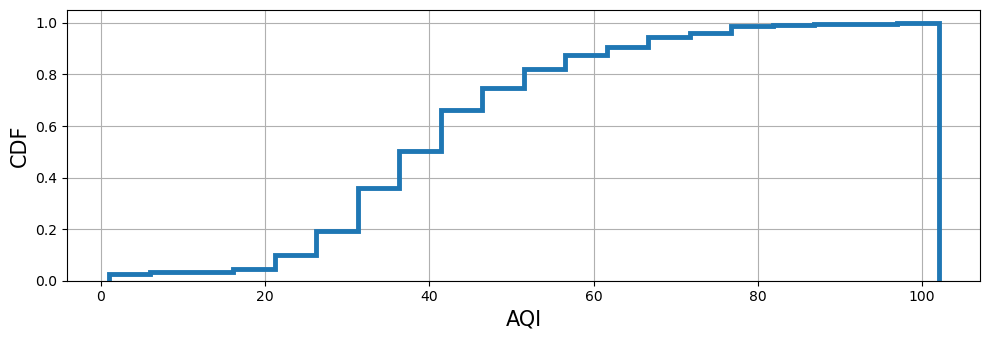

In [57]:
CovidAQIOnly_df.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('AQI',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

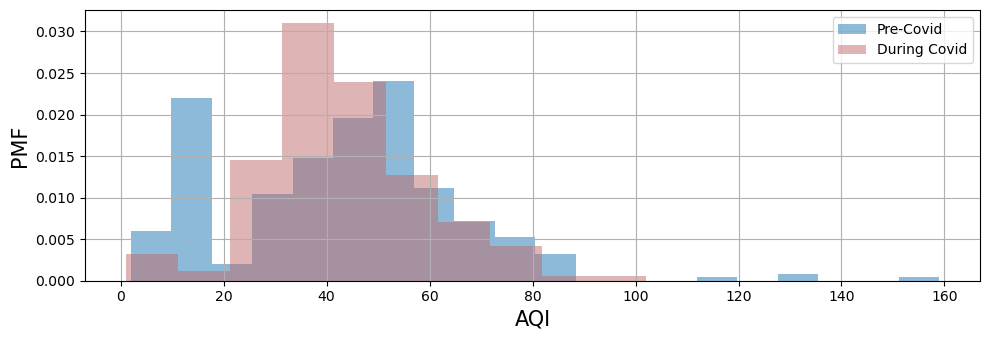

In [58]:
import seaborn as sns

PreCovidAQIOnly_df.hist(density=1, histtype='stepfilled', alpha=.5, bins=20, label='Pre-Covid')   # default number of bins = 10
CovidAQIOnly_df.hist(density=1, histtype='stepfilled', alpha=.5, label='During Covid', color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('AQI',fontsize=15)
plt.ylabel('PMF',fontsize=15)
plt.legend()
plt.show()

From the above graphs we can see that the probability of getting AQIs less than 100 is more probable, in fact during COVID we see a surge of records with AQI between 20 and 40 when taknig into consideration year 2019 and year 2020.

In [59]:
PreCovidAQIMonthly_df = PreCovidAQI_df.drop(['Date','pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], axis=1)
PreCovidAQIMonthly_df = PreCovidAQIMonthly_df.groupby([PreCovidAQIMonthly_df['YearMonth']]).mean()

PreCovidAQIMonthly_df = PreCovidAQIMonthly_df.rename_axis(['YearMonth']).reset_index()
#groupby([PreCovidAQI_df['YearMonth']]).mean()

In [60]:
CovidAQIMonthly_df = CovidAQI_df.drop(['Date','pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], axis=1)
CovidAQIMonthly_df = CovidAQIMonthly_df.groupby([CovidAQIMonthly_df['YearMonth']]).mean()

CovidAQIMonthly_df = CovidAQIMonthly_df.rename_axis(['YearMonth']).reset_index()

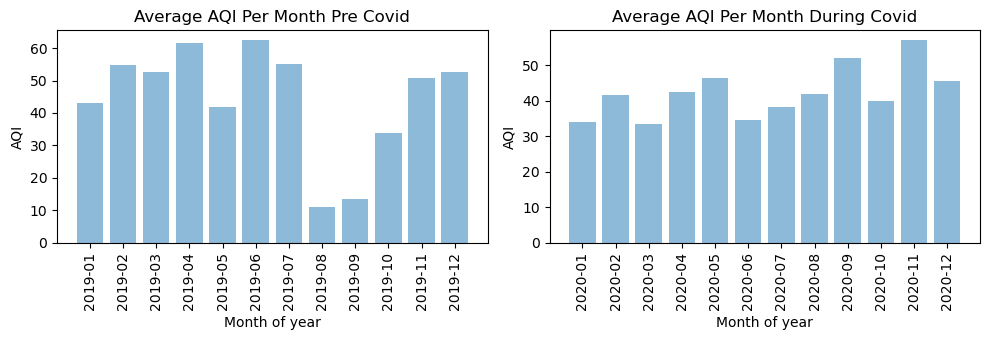

In [61]:
#plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.subplot(1,2,1)
default_x_ticks = range(len(PreCovidAQIMonthly_df))
plt.bar(default_x_ticks, PreCovidAQIMonthly_df['AQI'],align='center', alpha=0.5)
plt.xticks(default_x_ticks, PreCovidAQIMonthly_df['YearMonth'], rotation='vertical')
plt.ylabel('AQI')
plt.xlabel('Month of year')
plt.title('Average AQI Per Month Pre Covid')


plt.subplot(1,2,2)
default_x_ticks = range(len(CovidAQIMonthly_df))
plt.bar(default_x_ticks, CovidAQIMonthly_df['AQI'],align='center', alpha=0.5)
plt.xticks(default_x_ticks, CovidAQIMonthly_df['YearMonth'], rotation='vertical')
plt.ylabel('AQI')
plt.xlabel('Month of year')
plt.title('Average AQI Per Month During Covid')
plt.show()

As we can see in the above graphs, average AQI before Covid in year 2019, was much higher than year 2020. We can see that up till February in both years AQI was very similar, however started decreasing in 2020 during lockdown.

In [62]:
def skewness(x):
    res=0
    m=x.mean()
    s=x.std()
    for i in x:
        res+=(i-m)*(i-m)*(i-m)
    res/=(len(x)*s*s*s)
    return res

print ("The skewness of the \"pre-covid\" sample is:", skewness(PreCovidAQI_df.AQI))
print ("The skewness of the \"during covid\" sample is:", skewness(CovidAQI_df.AQI))
print ("The skewness of the whole sample is:", skewness(aqi_df.AQI))

The skewness of the "pre-covid" sample is: 0.6823924502872993
The skewness of the "during covid" sample is: 0.416942294382479
The skewness of the whole sample is: 12.280872146418291


In [63]:
def pearson(x):
    return 3*(x.mean()-x.median())*x.std()

print ("The Pearson's coefficient of the \"pre-covid\" sample is:", pearson(PreCovidAQI_df.AQI))
print ("The Pearson's coefficient of the \"during covid\" sample is:", pearson(CovidAQI_df.AQI))
print ("The Pearson's coefficient of the whole sample is:", pearson(aqi_df.AQI))

The Pearson's coefficient of the "pre-covid" sample is: -68.32132947048393
The Pearson's coefficient of the "during covid" sample is: 96.58882866438867
The Pearson's coefficient of the whole sample is: 480.5556788584525


# References


iqair, 2022. Air quality in Malta. [Online] 
Available at: https://www.iqair.com/malta/
[Accessed 28 December 2022].

Sanchez-Marre, M., 2022. Evolution of Decision Support Systems. In: Intelligent Decision Support Systems. s.l.:Springer International Publishing, pp. 55-73.

The World Air Quality Project, 2022. Msida Air Pollution: Real-time Air Quality Index (AQI). [Online] 
Available at: https://aqicn.org/city/malta/msida/
[Accessed 27 December 2022].


